In [2]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from label_flip_revised.utils import create_dir

In [3]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

C:\Users\Behzad\Desktop\KatJupy\diva-data-poisoning


In [4]:
path_output = os.path.join(PATH_ROOT, 'results_plot')
print(path_output)
#create_dir(path_output)

C:\Users\Behzad\Desktop\KatJupy\diva-data-poisoning\results_plot


In [5]:
df_falfa = pd.read_csv(os.path.join(PATH_ROOT, 'results', 'synth', 'synth_falfa_nn_db.csv'))
print(df_falfa.shape)
df_falfa.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Behzad\\Desktop\\KatJupy\\diva-data-poisoning\\results\\synth\\synth_falfa_nn_db.csv'

In [5]:
df_falfa.columns

Index(['Data', 'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 'N2', 'N2 SD',
       'N3', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 'L1', 'L2', 'L3',
       'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 'Hubs', 'Hubs SD',
       'Path.Train', 'Path.Poison', 'Path.Test', 'Rate', 'Train.Clean',
       'Test.Clean', 'Train.Poison', 'Test.Poison', 'Data.Base'],
      dtype='object')

In [7]:
cols_cm = [
    'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 'N2', 'N2 SD',
    'N3', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 'L1', 'L2', 'L3',
    'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 'Hubs', 'Hubs SD',
]
print(len(cols_cm))

28


In [8]:
def cor_at_rate(df, rate, x='Test.Poison', cols=cols_cm, eps=1e-4):
    df_ = df[(df['Rate'] >= rate - eps) & (df['Rate'] <= rate + eps)]
    print(df_.shape)
    df_cm = df_.loc[:, cols]
    df_cm['X'] = df_[x]
    cor = df_cm.corr()
    results = cor['X']
    return results

In [9]:
RATE0 = 0.
cor_0 = cor_at_rate(df_falfa, RATE0)

RATE = 0.3
cor_1 = cor_at_rate(df_falfa, RATE)

idx = cor_0.abs().sort_values(ascending=False).keys()[1:]
cor_0[idx]

NameError: name 'df_falfa' is not defined

In [6]:
# Save results
cor_0.to_csv(os.path.join(path_output, f'synth_corr_{RATE0*100:02.0f}.csv'))
cor_1.to_csv(os.path.join(path_output, f'synth_corr_{RATE*100:02.0f}.csv'))

NameError: name 'cor_0' is not defined

In [35]:
cor_0 = pd.read_csv(os.path.join(path_output, 'synth_corr_00.csv'), header=0, names=['idx', 'X'], index_col=0)
cor_1 = pd.read_csv(os.path.join(path_output, 'synth_corr_30.csv'), header=0, names=['idx', 'X'])

KeyError: 'F1'

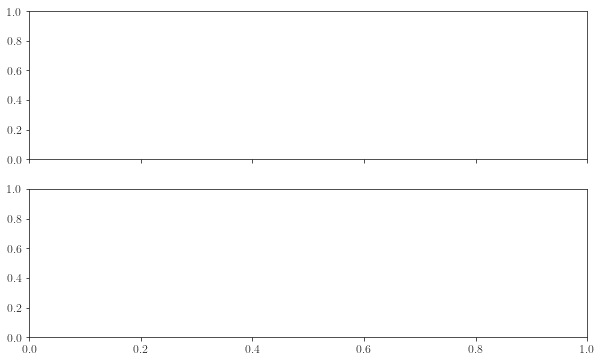

In [36]:
FIGSIZE = (10, 6)
FONTSIZE = 14
RATE = 0.3
idx=cols_cm[0]
sns.set_style("ticks", rc={"font.size": 11})
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.size": 14, "xtick.labelsize": 12, "ytick.labelsize": 12})
LINEWIDTH = 1.5

TITLES = ['(a) On clean data', f'(b) On {RATE*100:.0f}% poisoned data']

plt.rcParams["font.size"] = FONTSIZE
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=FIGSIZE)

cor_0[idx].plot.bar(ax=axs[0])
axs[0].set(ylim=[-1, 1], yticks=np.arange(-1, 1.1, 0.5))

cor_1[idx].plot.bar(ax=axs[1])
axs[1].set(ylim=[-1, 1], yticks=np.arange(-1, 1.1, 0.5))

for yy in [-0.5, 0, 0.5]:
    for i in range(2):
        axs[i].axhline(y=yy, linewidth=1.2, color='r', alpha=0.6, linestyle='--')
        axs[i].set_ylabel('Measure', fontsize=FONTSIZE+2)
        axs[i].set_title(TITLES[i], fontsize=FONTSIZE+3)

axs[1].tick_params(axis="x", rotation=90)
plt.xticks(fontsize=FONTSIZE+2)
plt.tight_layout(pad=0.8)

path_fig = os.path.join(path_output, 'synth_corr.pdf')
plt.savefig(path_fig, dpi=300)

In [11]:
train_diff = (df_falfa[df_falfa['Rate'] == 0.3]['Train.Clean'] - df_falfa[df_falfa['Rate'] == 0.3]['Train.Poison'])
print('Train drop: {:.1f} sd: {:.1f}'.format(train_diff.mean()*100, train_diff.std()*100))

Train drop: 1.0 sd: 5.6
